<a href="https://colab.research.google.com/github/SrMouraSilva/Modelagem-matematica-trabalho-final/blob/main/6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Programação simbólica
from sympy import *
from sympy.plotting import plot, plot3d
 
# Exibir símbolos nos plots
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"
 
javascript(url=url)
from IPython.display import Math
 
# Manipulação dos dados
import numpy as np
import pandas as pd
 
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()
 
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## Questão 6.7

In Exercise 5 of Chapter 4, we introduced a more sophisticated model of population growth in the whale problem.

Relembrando o exercício 4.5
> **Exercice 4.5** In the whale problem of Example 4.2 we used a logistic model of population growth, where the growth rate of population $P$ in the absence of interspecies competition is
$$g(P) = rP\left(1-\frac{P}{K}\right).$$
In this problem we will be using a more complex model,
$$g(P) = rP\left(\frac{P-c}{P+c}\right) \left(1-\frac{P}{K}\right),$$
in which the parameter $c$ represents a minimum viable population level below which the growth rate is negative. Assume that $\alpha=10^{-8}$ and that the minimum viable population level is 3,000 for blue whales and 15,000 for fin whales.



### a) Simulate this model, assuming that there are currently 5,000 blue whales and 70,000 fin whales. Use the simple simulation technique of Section 6.2, and assume that $\alpha = 10^{-8}$. What happens to the two species of whales over the long term, according to this model? Do both species of whales grow back, or will one or both species become extinct? How long does this take?


Temos as seguintes equações para o modelo

In [ ]:
def equacoes(x1, x2, alpha=1e-8, c1=3_000, r1=0.05):
    return (
        r1*x1*((x1-c1)/(x1+c1))*(1-(x1/150_000)) - alpha*x1*x2,
        0.08*x2*((x2-15_000)/(x2+15_000))*(1-(x2/400_000)) - alpha*x1*x2
    )

x1, x2 = var('x1 x2', real=True)

alpha=1e-8
dFdx1, dFdx2 = equacoes(x1, x2, alpha=alpha)

Math(f"""
\\begin{{aligned}}
\\frac{{dx_1}}{{dt}} = {latex(dFdx1)} \\\\
\\frac{{dx_2}}{{dt}} = {latex(dFdx2)} \\\\
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Pela técnica de simulação da Seção 6.2, uma $i$-ésima variável $x_{i,{t+1}}$ no tempo $t+1$ assume o valor de $x_{i,{t}} + f_{i}(\boldsymbol{x})$:
\begin{aligned}
x_{i,{k+1}} = x_{i,{k}} + f_{i}(\boldsymbol{x}_t),
\end{aligned}
sendo
 * $x_{i,{t}}$: $i$-ésima variável, no tempo anterior a $t+1$, ou seja, no tempo $t$;
 * $f_{i}(\boldsymbol{x}_t)$: $i$-ésima função, cujo a entrada corresponde a todas as variáveis no tempo $t$.
 
Nesta questão, temos as seguintes correspondências:
* $x_{1, t}$: população de baleias-azuis no $t$-ésimo ano;
* $x_{2, t}$: população de baleias-comuns no $t$-ésimo ano;
* $f_i(\boldsymbol{x}_t) = \frac{dx_i}{dt}$.

In [ ]:
def Simulacao(variaveis, valores_iniciais, funcoes, numero_iteracoes):
    num_variaveis = len(variaveis)
    x_ = np.zeros((num_variaveis, numero_iteracoes+1))
    x_[:, 0] = valores_iniciais

    for k in range(numero_iteracoes):
        x_k = x_[:, [k]]

        valores = {k: v for k, v in zip(variaveis, x_k.flatten())}
        for i, (variavel, funcao) in enumerate(zip(variaveis, funcoes)):
            x_i = valores[variavel]
            x_[i, k+1] = x_i + N(funcao.subs(valores))

    return pd.DataFrame(x_.T, columns=[str(v) for v in variaveis])

s = Simulacao(
    variaveis=(x1, x2),
    valores_iniciais=(5_000, 70_000),
    funcoes=(dFdx1, dFdx2),
    numero_iteracoes=400
)

Aplicada a simulação para uma quantidade considerável de anos, podemos ver o comportamento das populações no intervalo de tempo considerado:

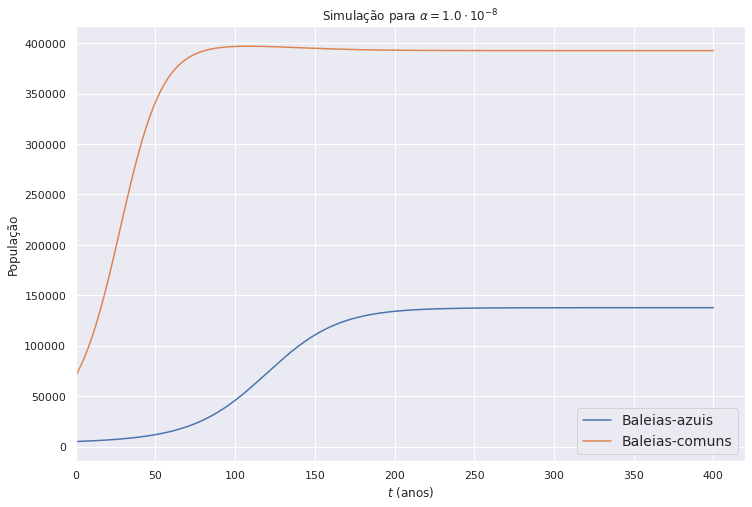

In [ ]:
ax = s.plot(xlabel='$t$ (anos)', ylabel='População', title=f'Simulação para $\\alpha={latex(RealNumber(alpha))}$', figsize=(12, 8))
ax.set_xlim(left=0);
plt.legend(['Baleias-azuis', 'Baleias-comuns']);

Nota-se que no gráfico acima, a quantidade de baleias-comuns cresce até chegar a um valor próximo do limite máximo populacional de baleias-comuns ($400{,}000$) por volta do centésimo ano. A partir do ano 100 aproximadamente, a medida que a quantidade de baleias-azuis aumenta, a quantidade de baleias-comuns diminui levemente, até que ambas as populações fiquem em estabilidade, logo as duas espécies coexistirão. Por fim, as duas espécies de baleias não voltarão a crescer e nem uma ou ambas as espécies se extinguirão, pois a coexistência entre as duas espécies existirá a longo prazo por causa da estabilidade.

In [ ]:
ano_final = s.iloc[-1]

Math(f"""
\\text{{População de baleias-comuns no }} {ano_final.name}º \\text{{ ano}}: {ano_final['x2']} \\\\
\\text{{População de baleias-azuis no }} {ano_final.name}º \\text{{ ano}}: {ano_final['x1']}
""")

<IPython.core.display.Math object>

Podemos ter uma noção melhor do comportamento do crescimento populacional das espécies ao visualizar o comportamento sobre o campo vetorial (setas azuis).
No gráfico abaixo, as setas do campo vetorial foram normalizadas para facilitar a visualização. A linha vermelha corresponde a simulação do modelo, apresentando a relação entre a população das espécies.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


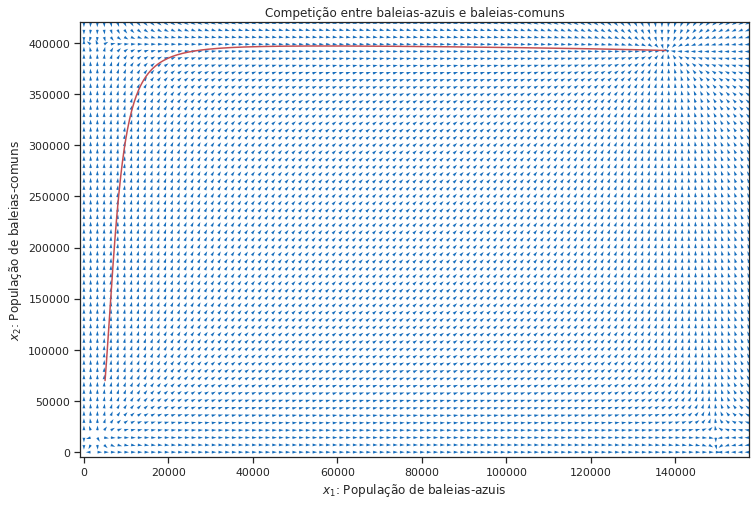

In [ ]:
def campo_vetorial(plots, cores, xlim, ylim, plot_campo_vetorial=True, legenda=None):
    fig = plt.figure(figsize=(12, 8))

    if plot_campo_vetorial:
        sns.set_style("ticks")
        x1graf, x2graf = np.meshgrid(np.linspace(0, xlim[1], 100), np.linspace(0, ylim[1], 60))
        f1, f2 = equacoes(x1graf, x2graf, alpha=alpha)
        normalizador = np.sqrt(f1**2+f2**2)
        plt.quiver(x1graf, x2graf, f1/normalizador, f2/normalizador, color='#156dbd', angles='xy', figure=fig)

    ax = plt.axes()
    ax.set_title("Competição entre baleias-azuis e baleias-comuns")
    ax.set_xlabel('$x_1$: População de baleias-azuis')
    ax.set_ylabel('$x_2$: População de baleias-comuns')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    for plot, cor in zip(plots, cores):
        ax.plot(*plot, color=cor,)

    if legenda is not None:
        plt.legend(legenda)
    plt.show();
    sns.set_theme()

campo_vetorial(
    [[s.x1, s.x2]],
    ['r'],
    xlim=[-1_000, 150_000*1.05],
    ylim=[-5_000, 400_000*1.05]
)

### b) Examine the sensitivity of your conclusions in part (a) to the assumption that there are currently $5{,}000$ blue whales. Repeat the simulation of part (a), assuming that there are originally $2{,}000$, $3{,}000$, $4{,}000$, $6{,}000$, or $8{,}000$ blue whales. How sensitive are your conclusions to the exact number of blue whales in the ocean at the present time?

Realizando as simulações solicitadas no enunciado:

In [ ]:
populacoes_iniciais = [2_000, 3_000, 4_000, 6_000, 8_000]
s_b = []

for populacao_inicial in populacoes_iniciais:
    simulacao = Simulacao(
        variaveis=(x1, x2),
        valores_iniciais=(populacao_inicial, 70_000),
        funcoes=(dFdx1, dFdx2),
        numero_iteracoes=400
    )
    simulacao[f'x1, {populacao_inicial}'] = simulacao['x1']
    simulacao[f'x2, {populacao_inicial}'] = simulacao['x2']
    del simulacao['x1']
    del simulacao['x2']
    s_b.append(simulacao)

Para o ano $t=400$, teremos as seguintes populações:

In [ ]:
pd.DataFrame([
    [
        populacao_inicial,
        *simulacao.iloc[-1]
    ]
    for i, (simulacao, populacao_inicial) in enumerate(zip(s_b, populacoes_iniciais))
], columns=["População inicial de baleias-azuis", "x_1", "x_2"])

,População inicial de baleias-azuis,x_1,x_2
0,2000,0.000004,399999.999999
1,3000,0.000189,399999.999963
2,4000,137696.147945,392568.333610
3,6000,137698.122845,392568.067061
4,8000,137698.257852,392568.048820


A legenda das colunas da tabela acima indica a população inicial da variável $x_1$ seguido das populações finais das variáveis $x_1$ e $x_2$.

Pela tabela acima, podemos observar que quando as populações iniciais de baleias-azuis estão no intervalo [$2{,}000,3{,}000$], esta espécie será extinta, pois isto se dá pela população mínima viável ser de $3{,}000$, definida na questão 4.5. Nestes cenários, as populações de baleias-comuns tenderão a se aproximar de $400{,}000$, o tamanho máximo da população viável para esta espécie. Além disso, a medida que a população inicial de baleias-azuis se aproxima de $0$ em menos tempo as duas populações de baleias se aproximarão do ponto de estabilidade ($0$ baleias-azuis, $400{,}000$ baleias-comuns).
 
Já quando as populações iniciais de baleias-azuis estão no intervalo ($3{,}000,8{,}000$], esta espécie coexistirá com a população de baleias-comuns. Nestes cenários, a medida que a população inicial de baleias-azuis se aproxima de $8{,}000$ em menos tempo as duas populações de baleias se aproximarão do ponto de estabilidade ($137{,}698$ baleias-azuis, $392{,}568$ baleias-comuns).
 
No gráfico seguinte, podemos ver o comportamento das duas populações ao longo do tempo. Nos cenários em que há extinção de baleias-azuis, as linhas que representam a população de baleias-azuis ($x_1$) ao longo do tempo estão coloridas de vermelho e as linhas que representam a população de baleias-comuns ($x_2$) estão coloridas de cinza.
 
Nos cenários de coexistência, as linhas representando a população de baleias-azuis ($x_1$) ao longo do tempo estão coloridas de azul e as linhas representando a população de baleias-comuns ($x_2$) estão coloridas de laranja.
 
A legenda das colunas do gráfico abaixo indica a variável ($x_1$ ou $x_2$) seguido da população inicial de $x_1$.

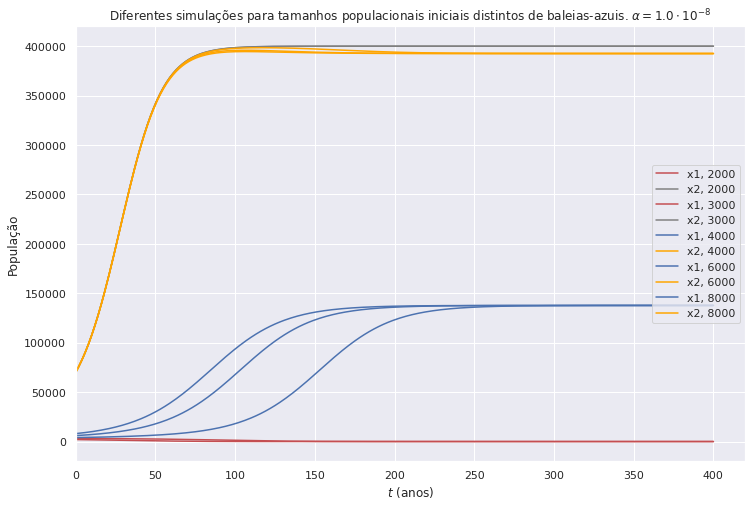

In [ ]:
ax = pd.concat(s_b, axis=1).plot(
    xlabel='$t$ (anos)',
    ylabel='População',
    title=f'Diferentes simulações para tamanhos populacionais iniciais distintos de baleias-azuis. $\\alpha={latex(RealNumber(alpha))}$',
    color=['r', 'gray', 'r', 'gray', 'b', 'orange', 'b', 'orange', 'b', 'orange'],
    figsize=(12, 8)
)
ax.set_xlim(left=0);

Vejamos o comportamento das simulações por meio de um gráfico sobre um campo vetorial (setas azuis). O gráfico seguinte apresenta as simulações em que ocorre a coexistência (linhas azuis) e que não ocorre (linhas vermelhas).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


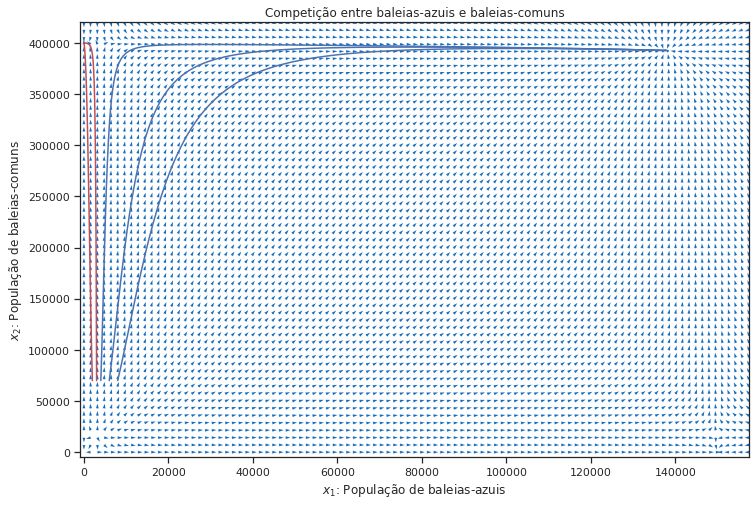

In [ ]:
campo_vetorial(
    [
        [
            simulacao[f'x1, {populacao_inicial}'],
            simulacao[f'x2, {populacao_inicial}'],
        ]
        for simulacao, populacao_inicial in zip(s_b, populacoes_iniciais)
    ],
    ['r', 'r', 'b', 'b', 'b', 'b'],
    xlim=[-1_000, 150_000*1.05],
    ylim=[-5_000, 400_000*1.05]
)

Agora o mesmo gráfico, mas com maiores detalhes nas linhas que representam a extinção de baleias-azuis:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


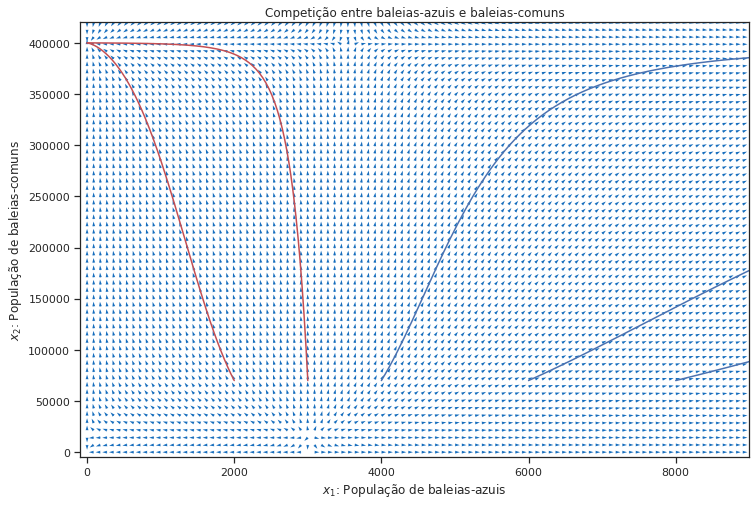

In [ ]:
campo_vetorial(
    [
        [
            simulacao[f'x1, {populacao_inicial}'],
            simulacao[f'x2, {populacao_inicial}'],
        ]
        for simulacao, populacao_inicial in zip(s_b, populacoes_iniciais)
    ],
    ['r', 'r', 'b', 'b', 'b', 'b'],
    xlim=[-100, 9_000],
    ylim=[-5_000, 400_000*1.05]
)

As conclusões sobre a sensibilidade de nossos resultados ao parâmetro, que mede a população inicial de baleias-azuis são:
* Quanto mais se aproxima a população inicial de baleias-azuis de $0$, em menos tempo as duas populações de baleias se aproximarão do ponto de estabilidade ($0$ baleias-azuis, $400,000$ baleias-comuns).
* Quanto mais se aproxima a população inicial de baleias-azuis do limite populacional máximo ($K=150,000$), em menos tempo as duas populações de baleias se aproximarão do ponto de estabilidade ($137,698$ baleias-azuis, $392,568$ baleias-comuns). 



### c) Examine the sensitivity of your conclusions in part (a) to the assumption that the intrinsic growth rate of the blue whale is $5\%$ per year. Repeat the simulation of part (a), assuming that the actual rate is $2$, $3$, $4$, $6$, or $7\%$ per year. How sensitive are your conclusions to the actual intrinsic growth rate for the blue whales

Realizando as simulações solicitadas no enunciado:

In [ ]:
taxas = [0.02, 0.03, 0.04, 0.06, 0.07]
s_c = []

for taxa in taxas:
    dFdx1, dFdx2 = equacoes(x1, x2, r1=taxa)

    simulacao = Simulacao(
        variaveis=(x1, x2),
        valores_iniciais=(5_000, 70_000),
        funcoes=(dFdx1, dFdx2),
        numero_iteracoes=400
    )

    simulacao[f'x1, {taxa}'] = simulacao['x1']
    simulacao[f'x2, {taxa}'] = simulacao['x2']
    del simulacao['x1']
    del simulacao['x2']
    s_c.append(simulacao)

Para o ano $t=400$, teremos as seguintes populações:

In [ ]:
pd.DataFrame([
    [
        taxa,
        *simulacao.iloc[-1]
    ]
    for i, (simulacao, taxa) in enumerate(zip(s_c, taxas))
], columns=["Taxa de crescimento intrínseco da população de baleias-azuis", "x_1", "x_2"])

,Taxa de crescimento intrínseco da população de baleias-azuis,x_1,x_2
0,0.02,62468.702103,396928.771817
1,0.03,127951.003197,393133.526876
2,0.04,134574.279600,392738.155640
3,0.06,139758.116177,392456.701579
4,0.07,141226.946041,392377.303628


A legenda das colunas da tabela acima indica a taxa de crescimento intrínseco da população de $x_1$ seguido das populações finais das variáveis $x_1$ e $x_2$.

Pela tabela acima, podemos observar que quando as taxas de crescimento intrínseco da população de baleias-azuis estão no intervalo $[0.02, 0.07]$, esta espécie coexistirá com a população de baleias-comuns. Nestes cenários, a medida que a taxa de crescimento intrínseco da população de baleias-azuis se aproxima de $0.07$ em menos tempo as duas populações de baleias se aproximarão do ponto de estabilidade ($137{,}698$ baleias-azuis e $392{,}568$ baleias-comuns).
 
No gráfico seguinte, podemos ver o comportamento ao longo do tempo. Para as simulações solicitadas, sempre haverá coexistência entre as espécies.
As linhas que representam a população de baleias-azuis ($x_1$) ao longo do tempo estão coloridas por tonalidades de azul. Já as linhas que representam a população de baleias-comuns ($x_2$) ao longo do tempo estão coloridas por tonalidades de vermelho.
 
A legenda das colunas do gráfico abaixo indica a variável ($x_1$ ou $x_2$) seguido da taxa de crescimento intrínseco de $x_1$.

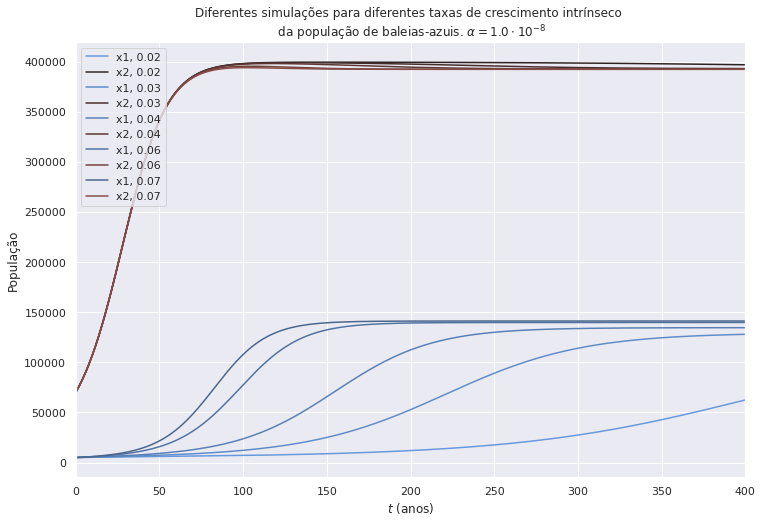

In [ ]:
ax = pd.concat(s_c, axis=1).plot(
    xlabel='$t$ (anos)',
    ylabel='População',
    title=f'Diferentes simulações para diferentes taxas de crescimento intrínseco \n da população de baleias-azuis. $\\alpha={latex(RealNumber(alpha))}$',
    color=np.array(
        list(zip(
            sns.dark_palette("#69d", len(s_c*2), reverse=True),
            sns.color_palette("dark:salmon_r", len(s_c*2))[::-1]
        ))
    ).reshape((-1, 3)),
    figsize=(12, 8)
)
ax.set_xlim(left=0, right=400);

Vejamos o comportamento das simulações por uma outra visão. O eixo $x$ representa a população de baleias-azuis e o eixo $y$ representa a população de baleias-comuns. Este gráfico é similar ao gráfico de campo vetorial apresentado no item b), porém o campo vetorial não foi apresentado, pois varia para cada simulação: A velocidade em que a simulação vai para a estabilidade depende da taxa de crescimento intrínseco.

A legenda do gráfico abaixo indica a taxa de crescimento intrínseco ($r_1$) para cada simulação.

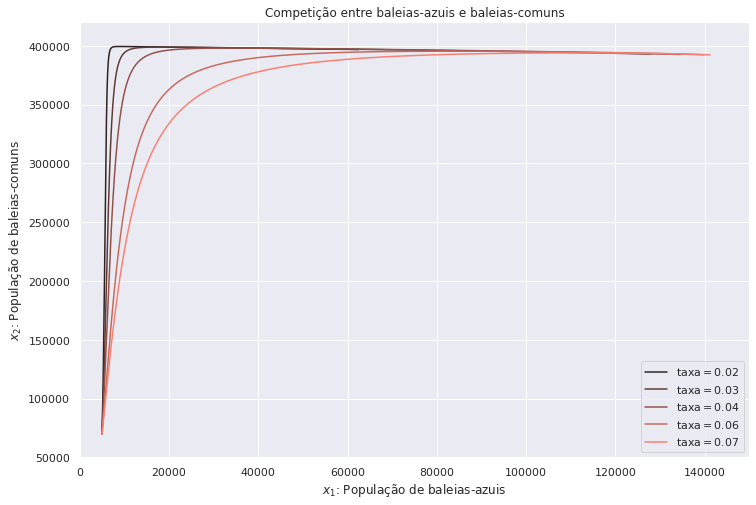

In [ ]:
campo_vetorial(
    [
        [
            simulacao[f'x1, {taxa}'],
            simulacao[f'x2, {taxa}'],
        ]
        for simulacao, taxa in zip(s_c, taxas)
    ],
    sns.color_palette("dark:salmon_r", len(s_c))[::-1],
    xlim=[0, 150_000],
    ylim=[50_000, 400_000*1.05],
    plot_campo_vetorial=False,
    legenda=[f'taxa$={taxa}$' for taxa in taxas]
)

A conclusão sobre a sensibilidade de nossos resultados ao parâmetro que mede a taxa de crescimento intrínseco da população de baleias-azuis para o cenário em que $\alpha=1\cdot10^{-8}$ e a população inicial das espécies de baleias-azuis e baleias-comuns é, respectivamente $5{,}000$ e $70{,}000$ é que:
 
* ao variar a taxa de crescimento intrínseco da população de baleias-azuis entre $2\%$ a $6\%$, percebemos que o modelo tende a ir mais rápido para o ponto de estabilidade no qual há coexistência entre as espécies.
 
Entretanto, não podemos generalizar a sensibilidade. Observe no gráfico abaixo que, quando a taxa de crescimento intrínseco da população de baleias-azuis corresponde a $1\%$, não ocorre coexistência entre as espécies:
\begin{aligned}
%* Quanto mais se aproxima a taxa de crescimento intrínseco da população de baleias-azuis de $0$ em mais tempo as duas populações de baleias se aproximarão do ponto de estabilidade ($0$ baleias-azuis, $400,000$ baleias-comuns).
%* Quanto mais se aproxima a taxa de crescimento intrínseco da população de baleias-azuis de $1.0$ em mais tempo as duas populações de baleias se aproximarão do ponto de estabilidade ($137,698$ baleias-azuis, $392,568$ baleias-comuns). 
\end{aligned}

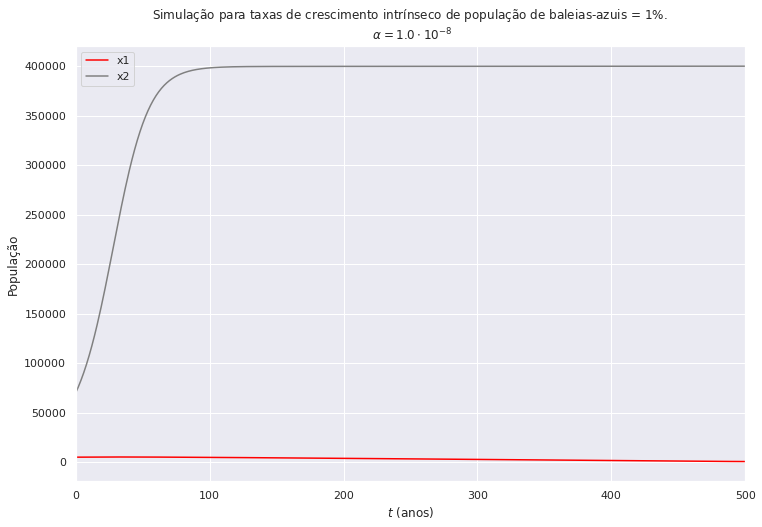

In [ ]:
ax = Simulacao(
    variaveis=(x1, x2),
    valores_iniciais=(5_000, 70_000),
    funcoes=equacoes(x1, x2, r1=0.01),
    numero_iteracoes=500
).plot(
    xlabel='$t$ (anos)',
    ylabel='População',
    title=f'Simulação para taxas de crescimento intrínseco de população de baleias-azuis = $1\%$. \n $\\alpha={latex(RealNumber(alpha))}$',
    color=['red', 'gray'],
    figsize=(12, 8)
)
ax.set_xlim(left=0, right=500);

### d) Examine the sensitivity of your conclusions in part (a) to the assumption that the minimum viable population level of the blue whale is $3{,}000$ whales. Repeat the simulation of part (a), assuming that the actual level is $1{,}000$, $2{,}000$, $4{,}000$, $5{,}000$, or $6{,}000$ whales. How sensitive are your conclusions to the actual minimum viable population level for the blue whales?

Realizando as simulações solicitadas no enunciado:


In [ ]:
minimos_viaveis = [1_000, 2_000, 4_000, 5_000, 6_000]
s_d = []

for minimo_viavel in minimos_viaveis:
    dFdx1, dFdx2 = equacoes(x1, x2, c1=minimo_viavel)

    simulacao = Simulacao(
        variaveis=(x1, x2),
        valores_iniciais=(5_000, 70_000),
        funcoes=(dFdx1, dFdx2),
        numero_iteracoes=400
    )

    simulacao[f'x1, {minimo_viavel}'] = simulacao['x1']
    simulacao[f'x2, {minimo_viavel}'] = simulacao['x2']
    del simulacao['x1']
    del simulacao['x2']
    s_d.append(simulacao)

Para o ano $t=400$, teremos as seguintes populações:

In [ ]:
pd.DataFrame([
    [
        minimo_viavel,
        *simulacao.iloc[-1]
    ]
    for i, (simulacao, minimo_viavel) in enumerate(zip(s_d, minimos_viaveis))
], columns=["População mínima viável de baleias-azuis", "x_1", "x_2"])

,População mínima viável de baleias-azuis,x_1,x_2
0,1000,138051.620374,392548.945657
1,2000,137876.413061,392558.423095
2,4000,137512.350897,392578.448747
3,5000,0.000326,399999.999936
4,6000,0.000034,399999.999993


A legenda das colunas da tabela acima indica a população mínima viável de $x_1$ seguido das populações finais das variáveis $x_1$ e $x_2$.

Pela tabela acima, podemos observar que quando as populações mínimas viáveis de baleias-azuis estão no intervalo [$1{,}000$, $4{,}000$], esta espécie coexistirá com a população de baleias-comuns. Já quando as populações mínimas viáveis de baleias-azuis estão no intervalo [$5{,}000$, $6{,}000$], esta espécie será extinta. 

 
No gráfico seguinte, podemos ver o comportamento ao longo do tempo. Nos cenários em que há extinção de baleias-azuis, as linhas que representam a população de baleias-azuis ($x_1$) ao longo do tempo estão coloridas de vermelho e as linhas que representam a população de baleias-comuns ($x_2$) estão coloridas de cinza.
 
Nos cenários de coexistência, as linhas representando a população de baleias-azuis ($x_1$) ao longo do tempo estão coloridas de azul e as linhas representando a população de baleias-comuns ($x_2$) estão coloridas de laranja.

A legenda das colunas do gráfico abaixo indica a variável ($x_1$ ou $x_2$) seguido da população mínima viável de $x_1$. 

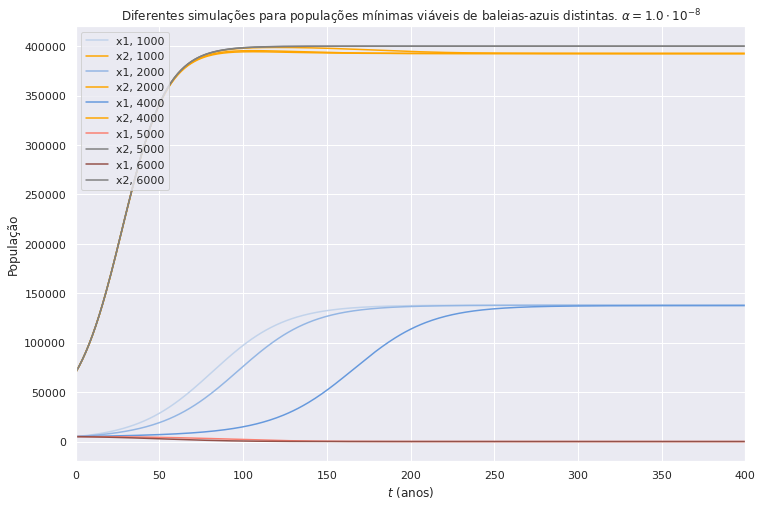

In [ ]:
paleta_azul = sns.color_palette("light:#69d", 4)[1:]
paleta_vermelha = sns.color_palette("dark:salmon_r", 3)

ax = pd.concat(s_d, axis=1).plot(
    xlabel='$t$ (anos)',
    ylabel='População',
    title=f'Diferentes simulações para populações mínimas viáveis de baleias-azuis distintas. $\\alpha={latex(RealNumber(alpha))}$',
    color=[paleta_azul[0], 'orange', paleta_azul[1], 'orange', paleta_azul[2], 'orange', paleta_vermelha[0], 'gray', paleta_vermelha[1], 'gray'],
    figsize=(12, 8)
)
ax.set_xlim(left=0, right=400);

Vemos no gráfico acima que nos cenários em que há coexistência entre as expécies, a medida que a população inicial de baleias-azuis se aproxima de $1{,}000$, o crescimento da população de baleias-azuis é mais rápido. Desta forma, em menos tempo as duas populações de baleias se aproximarão do ponto de estabilidade ($137{,}698$ baleias-azuis, $392{,}568$ baleias-comuns).
 
Já para os cenários em que não há coexistência, o decrescimento da população de baleias-azuis ocorre mais rápido a medida que a população mínima viável de baleias-azuis se aproxima de $6{,}000$. Desta forma, em menos tempo as duas populações de baleias se aproximarão do ponto de estabilidade ($0$ baleias-azuis, $400{,}000$ baleias-comuns). Este comportamento fica mais claro no gráfico seguinte, sendo o eixo $y=\text{tamanho da população}$ está na escala logarítmica.
 
A legenda das colunas do gráfico abaixo indica a variável ($x_1$ ou $x_2$) seguido da população mínima viável de $x_1$.

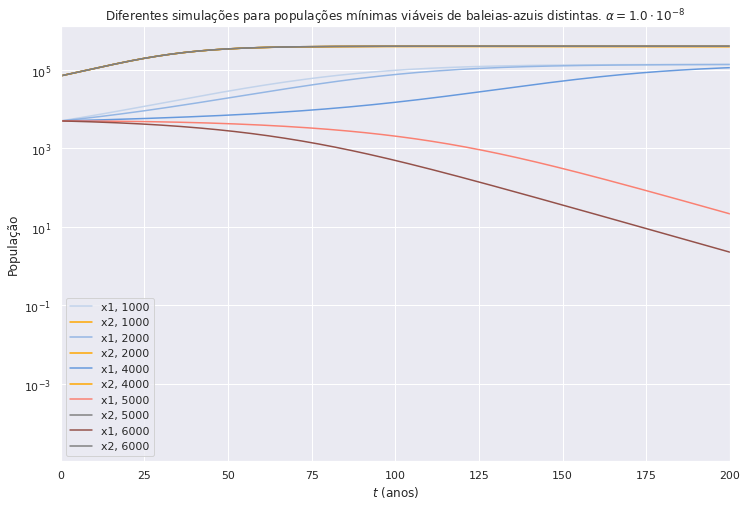

In [ ]:
ax = pd.concat(s_d, axis=1).plot(
    xlabel='$t$ (anos)',
    ylabel='População',
    title=f'Diferentes simulações para populações mínimas viáveis de baleias-azuis distintas. $\\alpha={latex(RealNumber(alpha))}$',
    color=[paleta_azul[0], 'orange', paleta_azul[1], 'orange', paleta_azul[2], 'orange', paleta_vermelha[0], 'gray', paleta_vermelha[1], 'gray'],
    figsize=(12, 8)
)
ax.set_xlim(left=0, right=200);
ax.set_yscale('log')

Vejamos o comportamento das simulações por uma outra visão. O eixo $x$ representa a população de baleias-azuis e o eixo $y$ representa a população de baleias-comuns. Este gráfico é similar ao gráfico de campo vetorial apresentado no item b), porém o campo vetorial não foi apresentado, pois varia para cada simulação: A velocidade em que a simulação vai para a estabilidade depende da taxa de crescimento intrínseco. Neste gráfico, as simulações em que ocorre a coexistência correspondem as linhas azuis e as que não ocorre correspondem as linhas vermelhas.

A legenda do gráfico abaixo indica a população mínima viável ($c_1$) para cada simulação.

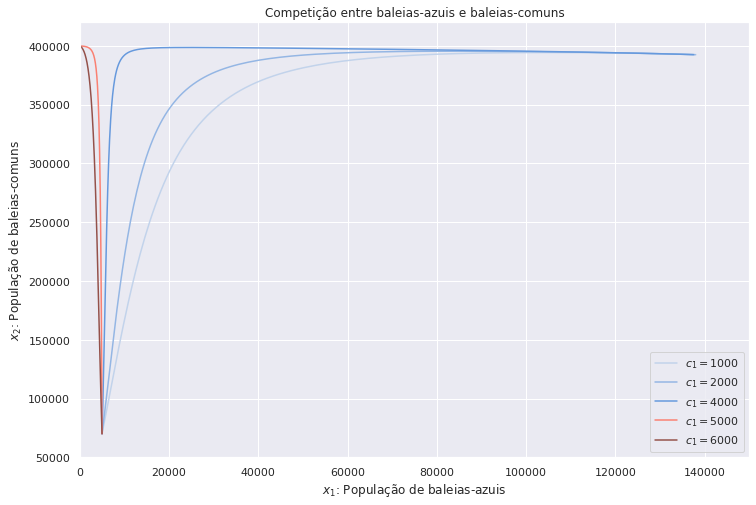

In [ ]:
campo_vetorial(
    [
        [
            simulacao[f'x1, {minimo_viavel}'],
            simulacao[f'x2, {minimo_viavel}'],
        ]
        for simulacao, minimo_viavel in zip(s_d, minimos_viaveis)
    ],
    paleta_azul + sns.color_palette("dark:salmon_r", 3),
    xlim=[0, 150_000],
    ylim=[50_000, 400_000*1.05],
    plot_campo_vetorial=False,
    legenda=[f'$c_1={minimo}$' for minimo in minimos_viaveis]
)

As conclusões sobre a sensibilidade de nossos resultados ao parâmetro, que mede a população mínima viável de baleias-azuis são:

* Quanto mais se aproxima a população mínima viável de baleias-azuis de $0$, a velocidade em que a população de baleias-azuis cresce é maior e em menos tempo as duas populações de baleias se aproximarão do ponto de estabilidade ($137{,}698$ baleias-azuis, $392{,}568$ baleias-comuns).
* Já quanto maior a população mínima viável de baleias-azuis é da população inicial de baleias-azuis, a velocidade em que a população de baleias-azuis diminui é maior e em menos tempo as duas populações de baleias se aproximarão do ponto de estabilidade ($0$ baleias-azuis, $400{,}000$ baleias-comuns).